In [1]:
%matplotlib inline
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import metric, motif
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True

In [2]:
# Parameters for synthesized time series
quarter_size = 8
pattern_size = quarter_size * 4
# num_samples_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
num_samples_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
std0 = 1
std1 = 0.05
std2 = 2 * std1

# Parameters for motif enumeration methods
window_size = pattern_size
mk_best_radius = 0.96
sf_best_radius = 0.83

# The number of trials
num_trials = 10

In [3]:
# Define motif-1 (triangular wave)
pattern1 = np.concatenate([
    np.arange(0, quarter_size),
    np.arange(quarter_size, -quarter_size, -1),
    np.arange(-quarter_size, 0)
]).astype('float')

# Define motif-2 (sine wave)
pattern2 = np.sin(np.linspace(0, 2 * np.pi, pattern_size))

# Standardize motifs
pattern1 = metric.standardize(pattern1, axis=0)
pattern2 = metric.standardize(pattern2, axis=0)

In [4]:
# Compute time complexity
lengths = []
result = []
for num_samples in num_samples_list:
    
    # Initialize random seed
    np.random.seed(0)
    
    # Generate patterns
    X1 = np.random.normal(0, std1, [num_samples, pattern_size])
    X1 += pattern1
    X2 = np.random.normal(0, std2, [num_samples, pattern_size])
    X2 += pattern2
    
    # Standardize patterns
    X1std = metric.standardize(X1.copy().T, axis=0).T
    X2std = metric.standardize(X2.copy().T, axis=0).T
    
    # Synthesize time seirs
    period = 3 * pattern_size
    X = np.random.normal(0, std0, [num_samples, period])
    begin1 = 2 * quarter_size
    end1 = 6 * quarter_size
    begin2 = 8 * quarter_size
    end2 = 12 * quarter_size
    X[:, begin1:end1] = X1
    X[:, begin2:end2] = X2
    X = X.reshape([-1, 1])
    Xtail = np.random.normal(0, std0, [2 * quarter_size, 1])
    X = np.concatenate([X, Xtail])
    length = len(X)
    lengths.append(length)
    print('\nnum_samples = {}'.format(num_samples))
    print('length = {}'.format(length))
    
    # ScanMK
    mk_times = []
    for i in range(num_trials):
        mk = motif.ScanMK()
        t0 = time.process_time()
        mk.compute([X], window_size, mk_best_radius)
        t1 = time.process_time()
        mk_times.append(t1 - t0)
        
    # SetFinder
    sf_times = []
    for i in range(num_trials):
        sf = motif.SetFinder()
        t0 = time.process_time()
        sf.compute([X], window_size, sf_best_radius)
        t1 = time.process_time()
        sf_times.append(t1 - t0)
        
    # HubFinder
    hf_times = []
    for i in range(num_trials):
        hf = motif.HubFinder()
        t0 = time.process_time()
        hf.compute([X], window_size)
        t1 = time.process_time()
        hf_times.append(t1 - t0)
        
    # Store results
    mk_time_mean = np.mean(mk_times)
    sf_time_mean = np.mean(sf_times)
    hf_time_mean = np.mean(hf_times)
    mk_time_std = np.std(mk_times)
    sf_time_std = np.std(sf_times)
    hf_time_std = np.std(hf_times)
    result.append([num_samples, length, mk_time_mean, mk_time_std, sf_time_mean, sf_time_std, hf_time_mean, hf_time_std])

# Display result
result = pd.DataFrame(result, columns=['num_samples', 'length', 'mk_time_mean', 'mk_time_std', 'sf_time_mean', 'sf_time_std', 'hf_time_mean', 'hf_time_std'])
display(result)


num_samples = 10
length = 976


HubFinder: 100%|███████████████████████████████████████████████████████████████████| 945/945 [00:00<00:00, 8238.96it/s]



num_samples = 20
length = 1936


HubFinder: 100%|█████████████████████████████████████████████████████████████████| 1905/1905 [00:00<00:00, 8473.62it/s]



num_samples = 30
length = 2896


HubFinder: 100%|█████████████████████████████████████████████████████████████████| 2865/2865 [00:00<00:00, 6285.90it/s]



num_samples = 40
length = 3856


HubFinder: 100%|█████████████████████████████████████████████████████████████████| 3825/3825 [00:00<00:00, 5368.98it/s]



num_samples = 50
length = 4816


HubFinder: 100%|█████████████████████████████████████████████████████████████████| 4785/4785 [00:02<00:00, 2232.09it/s]



num_samples = 60
length = 5776


HubFinder: 100%|█████████████████████████████████████████████████████████████████| 5745/5745 [00:03<00:00, 1483.96it/s]



num_samples = 70
length = 6736


HubFinder: 100%|█████████████████████████████████████████████████████████████████| 6705/6705 [00:05<00:00, 1290.22it/s]



num_samples = 80
length = 7696


HubFinder: 100%|██████████████████████████████████████████████████████████████████| 7665/7665 [00:08<00:00, 946.34it/s]



num_samples = 90
length = 8656


HubFinder: 100%|██████████████████████████████████████████████████████████████████| 8625/8625 [00:11<00:00, 429.37it/s]



num_samples = 100
length = 9616


HubFinder: 100%|██████████████████████████████████████████████████████████████████| 9585/9585 [00:15<00:00, 311.79it/s]


,num_samples,length,mk_time_mean,mk_time_std,sf_time_mean,sf_time_std,hf_time_mean,hf_time_std
0,10,976,0.268750,0.022964,0.267188,0.012979,0.146875,0.022317
1,20,1936,0.635938,0.037008,0.609375,0.013975,0.310937,0.010937
2,30,2896,3.539062,0.121283,3.592188,0.045528,0.746875,0.054036
3,40,3856,7.803125,0.140312,7.698437,0.081205,1.196875,0.021195
4,50,4816,4.015625,0.083268,4.220313,0.174895,3.279688,0.096179
5,60,5776,5.245312,0.109832,5.450000,0.198604,5.015625,0.150520
6,70,6736,39.132812,0.483732,37.978125,1.105831,6.734375,0.102221
7,80,7696,9.870313,0.260806,9.565625,0.239200,10.118750,0.236882
8,90,8656,79.323437,2.079030,81.617188,2.261162,12.996875,0.209375
9,100,9616,109.343750,2.292992,104.667187,1.741946,18.429688,1.192961


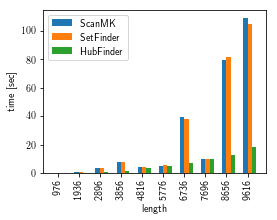

In [5]:
# Visualize time complexity
width = lengths[0] * 0.2
lengths = np.array(lengths)
fig, ax = plt.subplots(figsize=(4, 3))
ax.bar(lengths - width, result['mk_time_mean'], width=width, align='edge', color='tab:blue', label='ScanMK')
ax.bar(lengths, result['sf_time_mean'], width=width, align='edge', color='tab:orange', label='SetFinder')
ax.bar(lengths + width, result['hf_time_mean'], width=width, align='edge', color='tab:green', label='HubFinder')
# ax.set_yscale('log')
ax.set_xticks(lengths)
ax.set_xticklabels(lengths, rotation=90)
ax.set_xlabel('length')
ax.set_ylabel('time [sec]')
plt.legend()
plt.savefig('../figures/synthetic_complexity.pdf', bbox_inches='tight')